In [1]:
# Reference: https://github.com/statsmodels/statsmodels/blob/master/examples/notebooks/generic_mle.ipynb
%matplotlib inline
import numpy as np
import patsy
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import nbinom
from statsmodels.base.model import GenericLikelihoodModel
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
data_file = '/scratch/sk7898/pedbike/1006_f_465_humans_490_bikes_13_feats.csv'
data  = pd.read_csv(data_file)
indices = np.arange(len(data))
train, test, train_indices, test_indices = train_test_split(data, indices, test_size=0.2, random_state=42)
train_1, val, train_indices, val_indices = train_test_split(train, train_indices, test_size=0.1, random_state=42)

#print('Features: ', data.columns)
#print('{} Train Indices: {}'.format(len(train_indices), train_indices))
#print('{} Val Indices: {}'.format(len(val_indices), val_indices))
#print('{} Test Indices: {}'.format(len(test_indices), test_indices))
#np.savetxt('train_indices.txt', train_indices, fmt='%u')
#np.savetxt('val_indices.txt', val_indices, fmt='%u')
#np.savetxt('test_indices.txt', test_indices, fmt='%u')

In [3]:
y_train, X_train = patsy.dmatrices('Target ~ th_2_numHitBins_max + th_2_numHitBins_median + th_6_moment_sum + th_6_freqWidth + th_8_numHitBins_var + th_16_moment_sum + th_42_moment_sum + th_46_maxFreq + th_62_numHitBins_median + th_90_moment_sum + th_98_numHitBins_median + th_198_maxFreq', data=train_1)
y_test, X_test = patsy.dmatrices('Target ~ th_2_numHitBins_max + th_2_numHitBins_median + th_6_moment_sum + th_6_freqWidth + th_8_numHitBins_var + th_16_moment_sum + th_42_moment_sum + th_46_maxFreq + th_62_numHitBins_median + th_90_moment_sum + th_98_numHitBins_median + th_198_maxFreq', data=test)
#X_train = preprocessing.normalize(X_train)
#X_test = preprocessing.normalize(X_test)

In [4]:
nb_results = sm.GLM(y_train.astype(int), X_train, family=sm.families.NegativeBinomial()).fit()
print(nb_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  687
Model:                            GLM   Df Residuals:                      674
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1393.2
Date:                Thu, 05 Dec 2019   Deviance:                       71.596
Time:                        17:12:14   Pearson chi2:                     86.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [72]:
print(nb_results.model.exog_names)
print(nb_results.model.endog_names)

['Intercept', 'th_2_numHitBins_max', 'th_2_numHitBins_median', 'th_6_moment_sum', 'th_6_freqWidth', 'th_8_numHitBins_var', 'th_16_moment_sum', 'th_42_moment_sum', 'th_46_maxFreq', 'th_62_numHitBins_median', 'th_90_moment_sum', 'th_98_numHitBins_median', 'th_198_maxFreq']
Target


In [5]:
print_pred = False
y_pred_test = nb_results.predict(X_test)
y_pred_train = nb_results.predict(X_train)
if print_pred:
    for y_p, y_t in zip(y_pred_test.astype(np.int8), test.Target):
        print(y_p, y_t)
    
    for y_p, y_t in zip(y_pred_train.astype(np.int8), train.Target):
        print(y_p, y_t)

In [6]:
print(mean_absolute_error(y_train.astype(np.int8), y_pred_train.astype(np.int8)))
print(mean_absolute_error(test.Target, y_pred_test.astype(np.int8)))

0.6229985443959243
0.581151832460733


**Summary**

*Train Shape: (668, 13)*\
*Val Shape: (77, 13) Not used in GLM but used in SVR*\
*Test Shape: (191, 13)*

*Without normalization*
* Train MAE:0.6229985443959243
* Test MAE: 0.581151832460733 

*With normalization*
* Train MAE: 0.6916167664670658
* Test MAE: 0.6724738675958188

*If all the samples were used for Train i.e. (955, 13)*
* MAE: 0.6083769633507854

In [91]:
nobs = nb_results.nobs
y = nb_results.model.endog/nb_results.model.endog.sum()
yhat = nb_results.mu

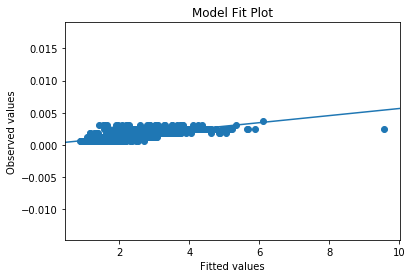

In [98]:
from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

**Study with 2 Counters**

In [23]:
data_bike = data[data.classLabel == "Bike"]
data_ped = data[data.classLabel == "Human"]

train_bike, test_bike = train_test_split(data_bike, train_size=0.7, random_state=42)
y_bike_train, X_bike_train = patsy.dmatrices('Target ~ th_2_numHitBins_max + th_2_numHitBins_median + th_6_moment_sum + th_6_freqWidth + th_8_numHitBins_var + th_16_moment_sum + th_42_moment_sum + th_46_maxFreq + th_62_numHitBins_median + th_90_moment_sum + th_98_numHitBins_median + th_198_maxFreq', data=train_bike)
y_bike_test, X_bike_test = patsy.dmatrices('Target ~ th_2_numHitBins_max + th_2_numHitBins_median + th_6_moment_sum + th_6_freqWidth + th_8_numHitBins_var + th_16_moment_sum + th_42_moment_sum + th_46_maxFreq + th_62_numHitBins_median + th_90_moment_sum + th_98_numHitBins_median + th_198_maxFreq', data=test_bike)

train_ped, test_ped = train_test_split(data_ped, train_size=0.7, random_state=42)
y_ped_train, X_ped_train = patsy.dmatrices('Target ~ th_2_numHitBins_max + th_2_numHitBins_median + th_6_moment_sum + th_6_freqWidth + th_8_numHitBins_var + th_16_moment_sum + th_42_moment_sum + th_46_maxFreq + th_62_numHitBins_median + th_90_moment_sum + th_98_numHitBins_median + th_198_maxFreq', data=train_ped)
y_ped_test, X_ped_test = patsy.dmatrices('Target ~ th_2_numHitBins_max + th_2_numHitBins_median + th_6_moment_sum + th_6_freqWidth + th_8_numHitBins_var + th_16_moment_sum + th_42_moment_sum + th_46_maxFreq + th_62_numHitBins_median + th_90_moment_sum + th_98_numHitBins_median + th_198_maxFreq', data=test_ped)

In [27]:
print(X_ped_train.shape)
print(X_ped_test.shape)

(325, 13)
(140, 13)


In [24]:
nb_bike = sm.GLM(y_bike_train.astype(int), X_bike_train, family=sm.families.NegativeBinomial()).fit()
y_pred_bike_train = nb_bike.predict(X_bike_train)
y_pred_bike_test = nb_bike.predict(X_bike_test)
print(mean_absolute_error(y_bike_train.astype(np.int8), y_pred_bike_train.astype(np.int8)))
print(mean_absolute_error(y_bike_test.astype(np.int8), y_pred_bike_test.astype(np.int8)))

0.5801749271137027
0.4965986394557823


In [25]:
nb_ped  = sm.GLM(y_ped_train.astype(int), X_ped_train, family=sm.families.NegativeBinomial()).fit()
y_pred_ped_train = nb_ped.predict(X_ped_train)
y_pred_ped_test = nb_ped.predict(X_ped_test)
print(mean_absolute_error(y_ped_train.astype(np.int8), y_pred_ped_train.astype(np.int8)))
print(mean_absolute_error(y_ped_test.astype(np.int8), y_pred_ped_test.astype(np.int8)))

0.5507692307692308
0.5928571428571429


**Summary**

**Human Counter**
* Train Shape: (325, 13)
* Test Shape: (140, 13)

* Train MAE:0.5507692307692308
* Test MAE: 0.5928571428571429 

**Bike Counter**
* Train Shape: (343, 13)
* Test Shape: (147, 13)
    
* Train MAE: 0.5801749271137027
* Test MAE: 0.4965986394557823